In [474]:
import pcse
from pcse.fileinput import CABOFileReader, PCSEFileReader
from pcse.util import WOFOST72SiteDataProvider
import os
import matplotlib.pyplot as plt
import pandas as pd
import yaml

In [475]:
def get_weatherdataprovider(lat, long):
    location = (lat, long)
    return pcse.db.NASAPowerWeatherDataProvider(*location)

In [476]:
wdp = get_weatherdataprovider(-33.385300, 148.007904)
print(wdp)

Weather data provided by: NASAPowerWeatherDataProvider
--------Description---------
NASA/POWER CERES/MERRA2 Native Resolution Daily Data
----Site characteristics----
Elevation:  291.1
Latitude:  -33.385
Longitude: 148.008
Data available for 1984-01-01 - 2022-07-21
Number of missing days: 1



In [477]:
wofostPP = pcse.start_wofost(mode='pp')

/home/tmrob2/python_envs/farming/lib/python3.8/site-packages/pcse/db/pcse/db_input.py:652: SAWarning: Dialect sqlite+pysqlite does *not* support Decimal objects natively, and SQLAlchemy must convert from floating point - rounding errors and other issues may occur. Please consider storing Decimal numbers as strings or integers on this platform for lossless storage.
  r = select([table_site],
/home/tmrob2/python_envs/farming/lib/python3.8/site-packages/pcse/db/pcse/db_input.py:127: SAWarning: Dialect sqlite+pysqlite does *not* support Decimal objects natively, and SQLAlchemy must convert from floating point - rounding errors and other issues may occur. Please consider storing Decimal numbers as strings or integers on this platform for lossless storage.
  r = s.execute()
/home/tmrob2/python_envs/farming/lib/python3.8/site-packages/pcse/db/pcse/db_input.py:183: SAWarning: Dialect sqlite+pysqlite does *not* support Decimal objects natively, and SQLAlchemy must convert from floating point - 

In [478]:
wofostPP.run()

In [479]:
wofostPP.run(days=10)

In [480]:
wofostPP.get_variable("LAI")

0.2870809817505803

In [481]:
wofostPP.run(days=25)
wofostPP.get_variable("LAI")

1.5281221557442748

In [482]:
wofostPP.run_till_terminate()
print(wofostPP.get_variable("LAI"))

None


In [483]:
output = wofostPP.get_output()
dfPP = pd.DataFrame(output).set_index("day")
dfPP.tail()

,DVS,LAI,TAGP,TWSO,TWLV,TWST,TWRT,TRA,RD,SM,WWLOW
day,,,,,,,,,,,
2000-05-27,1.934169,0.0,18091.006102,8729.399813,3126.21567,6235.390619,1613.465879,0.0,60.0,0.3175,None
2000-05-28,1.953874,0.0,18091.006102,8729.399813,3126.21567,6235.390619,1613.465879,0.0,60.0,0.3175,None
2000-05-29,1.974056,0.0,18091.006102,8729.399813,3126.21567,6235.390619,1613.465879,0.0,60.0,0.3175,None
2000-05-30,1.995758,0.0,18091.006102,8729.399813,3126.21567,6235.390619,1613.465879,0.0,60.0,0.3175,None
2000-05-31,2.000000,0.0,18091.006102,8729.399813,3126.21567,6235.390619,1613.465879,0.0,60.0,0.3175,None


In [484]:
summary_output = wofostPP.get_summary_output()
msg = "Reached maturity at {DOM} with total biomass {TAGP:.1f} kg/ha, " \
      "a yield of {TWSO:.1f} kg/ha with a maximum LAI of {LAIMAX:.2f}."
for crop_cycle in summary_output:
    print(msg.format(**crop_cycle))

Reached maturity at 2000-05-31 with total biomass 18091.0 kg/ha, a yield of 8729.4 kg/ha with a maximum LAI of 6.23.


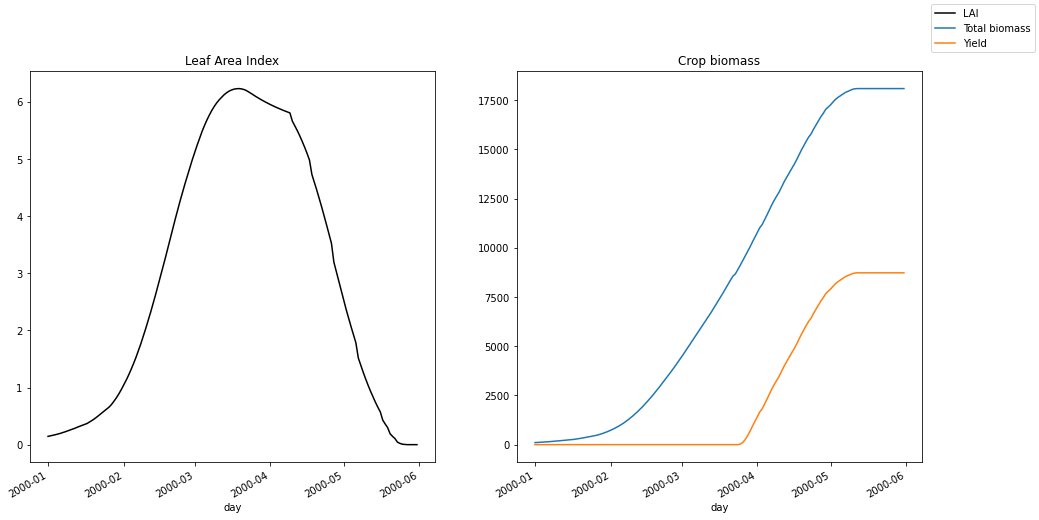

In [485]:
fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
dfPP.LAI.plot(ax=axis1, label="LAI", color='k')
dfPP.TAGP.plot(ax=axis2, label="Total biomass")
dfPP.TWSO.plot(ax=axis2, label="Yield")
axis1.set_title("Leaf Area Index")
axis2.set_title("Crop biomass")
fig.autofmt_xdate()
r = fig.legend()

Get the crop data from the crop data directory

In [486]:
data_dir = os.path.join(os.getcwd(), "farm_gym/envs/env_data/CROPD/")
cropfile = os.path.join(data_dir, 'SW.crop')
cropd = PCSEFileReader(cropfile)


Get the soil data from the soil data directory

In [487]:
soil_dir = os.path.join(os.getcwd(), "farm_gym/envs/env_data/SOILD")
soilfile = os.path.join(soil_dir, "spring-wheat.soil")
soild = PCSEFileReader(soilfile)

Site parameters provide ancillary parameters that are not related to the crop or the soil. Examples are initial conditions of the water balance as the inital soild water content WAV and initial and maximum surface storage SSI, SSMAX. 

In [488]:
site_dir = os.path.join(os.getcwd(), "farm_gym/envs/env_data/site")
sitefile = os.path.join(site_dir, "sprint-wheat-site.site")
sited = PCSEFileReader(sitefile)

Packaging all of the parameters

In [489]:
from pcse.base import ParameterProvider
parameters = ParameterProvider(cropdata=cropd, soildata=soild, sitedata=sited)

In [490]:
from pcse.fileinput import YAMLAgroManagementReader
agro_dir = os.path.join(os.getcwd(), "farm_gym/envs/env_data/agro/")
agromanagement_file = os.path.join(agro_dir, 'wheat_calender.yaml')
agromanagement = YAMLAgroManagementReader(agromanagement_file)
print(agromanagement)

!!python/object/new:pcse.fileinput.yaml_agro_loader.YAMLAgroManagementReader
listitems:
- 2018-01-01:
    CropCalendar:
      crop_end_date: 2018-10-20
      crop_end_type: earliest
      crop_name: wheat
      crop_start_date: 2018-03-31
      crop_start_type: emergence
      max_duration: 300
      variety_name: spring-wheat
    StateEvents: null
    TimedEvents:
    - comment: All irrigation amounts in cm
      event_signal: irrigate
      events_table:
      - 2018-07-10:
          amount: 10
          efficiency: 0.7
      - 2018-08-05:
          amount: 5
          efficiency: 0.7
      name: Irrigation application table



In [491]:
from pcse.models import LINTUL3
lintul3 = LINTUL3(parameters, wdp, agromanagement)

In [492]:
lintul3.run_till_terminate()

In [493]:
output = lintul3.get_output()
df = pd.DataFrame(output).set_index("day")
df.tail()

,DVS,TGROWTH,LAI,NUPTT,TRAN,TIRRIG,TNSOIL,TRAIN,TRANRF,TRUNOF,TAGBM,TTRAN,WC,WLVD,WLVG,WRT,WSO,WST
day,,,,,,,,,,,,,,,,,,
2018-08-29,1.969602,2.202698,0.005203,0.0,0.0,0.0,1.51,125.18,0.0,0.0,4.602698,0.185201,0.122279,2.163497,0.236503,0.122452,1.907815,0.294884
2018-08-30,1.976447,2.202698,0.005111,0.0,0.0,0.0,1.52,125.18,0.0,0.0,4.602698,0.185201,0.120189,2.167688,0.232312,0.118778,1.907815,0.294884
2018-08-31,1.986165,2.202698,0.005010,0.0,0.0,0.0,1.53,125.18,0.0,0.0,4.602698,0.185201,0.118252,2.172291,0.227709,0.115215,1.907815,0.294884
2018-09-01,1.998194,2.202698,0.004882,0.0,0.0,0.0,1.54,130.16,0.0,0.0,4.602698,0.185201,0.123700,2.178080,0.221920,0.111758,1.907815,0.294884
2018-09-02,2.000000,2.202698,0.004764,0.0,0.0,0.0,1.55,130.29,0.0,0.0,4.602698,0.185201,0.120602,2.183435,0.216565,0.108406,1.907815,0.294884


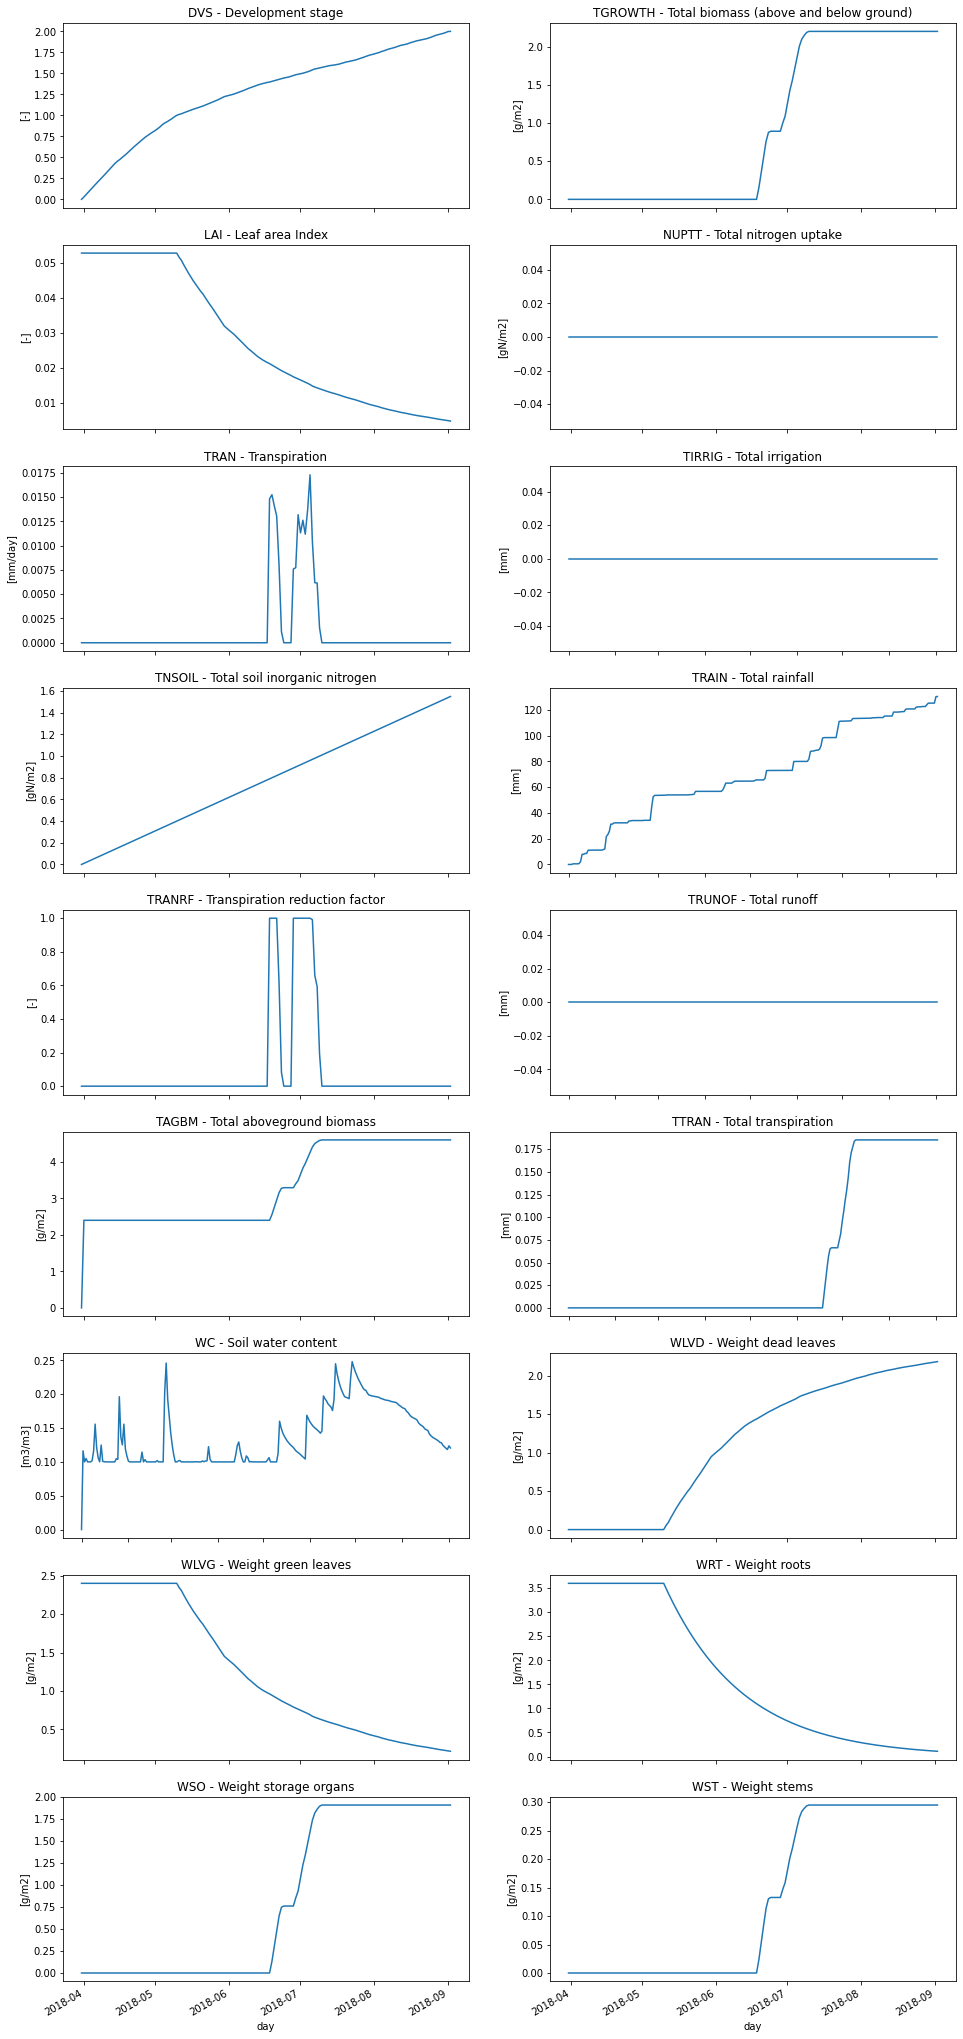

In [494]:
titles = {"DVS":("Development stage", "-"),
          "TGROWTH": ("Total biomass (above and below ground)", "g/m2"),
          "LAI": ("Leaf area Index", "-"),
          "NUPTT": ("Total nitrogen uptake", "gN/m2"),
          "TRAN": ("Transpiration", "mm/day"),
          "TIRRIG": ("Total irrigation", "mm"),
          "TNSOIL": ("Total soil inorganic nitrogen", "gN/m2"),
          "TRAIN": ("Total rainfall", "mm"),
          "TRANRF": ("Transpiration reduction factor", "-"),
          "TRUNOF": ("Total runoff", "mm"),
          "TAGBM": ("Total aboveground biomass", "g/m2"),
          "TTRAN": ("Total transpiration", "mm"),
          "WC": ("Soil water content", "m3/m3"),
          "WLVD": ("Weight dead leaves", "g/m2"),
          "WLVG": ("Weight green leaves", "g/m2"),
          "WRT": ("Weight roots", "g/m2"),
          "WSO": ("Weight storage organs", "g/m2"),
          "WST": ("Weight stems", "g/m2")
         }
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(16,40))
for key, axis in zip(df.columns, axes.flatten()):
    name, unit = titles[key]
    title = f"{key} - {name}"
    df[key].plot(ax=axis, title=title)
    axis.set_ylabel(f"[{unit}]")
fig.autofmt_xdate()